In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Define directories
base_dir = "/content/drive/MyDrive/masters thesis ali alhaj hassan/data_scraping_and_preperation"
plot_dir = os.path.join(base_dir, "analyses and plots/FW_plots")
os.makedirs(plot_dir, exist_ok=True)  # Ensure the directory exists

# Load the dataset
file_path = os.path.join(base_dir, "merged_data/position_based_files_scaled/FW.csv")
df = pd.read_csv(file_path)


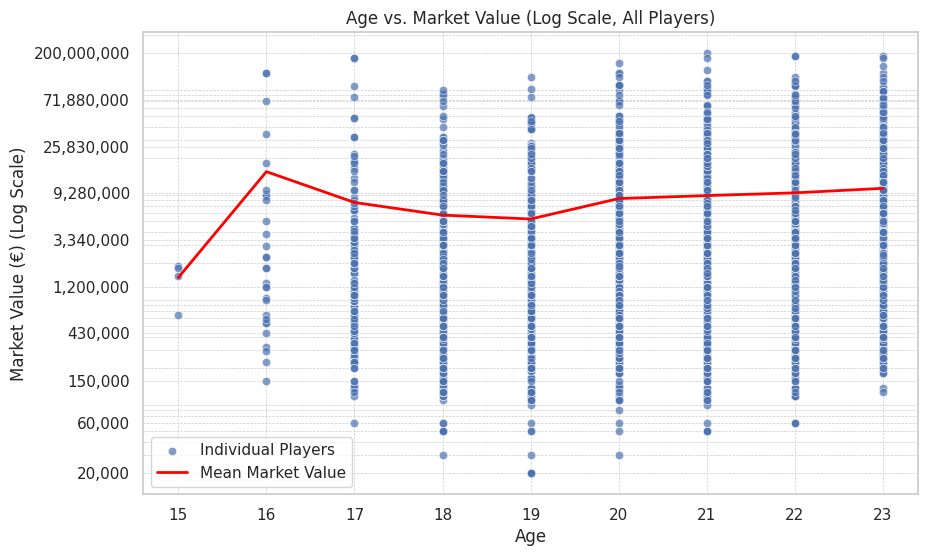

In [3]:



# Remove zero and negative Market Values (since log scale doesn't support them)
df = df[df["MarketValue"] > 0]

# Set plot style
sns.set_theme(style="whitegrid")

min_value = df["MarketValue"].min()
max_value = df["MarketValue"].max()

log_ticks = np.round(np.logspace(np.log10(min_value), np.log10(max_value), num=10), -4)

# Compute mean market value per age
mean_market_value_by_age = df.groupby("Age")["MarketValue"].mean().reset_index()

# 1️⃣ General Scatter Plot: Age vs. Market Value (All Players) with Logarithmic Scale
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(data=df, x="Age", y="MarketValue", alpha=0.7, label="Individual Players")

# Line plot of mean market value per age
sns.lineplot(data=mean_market_value_by_age, x="Age", y="MarketValue", color='red', linewidth=2, label="Mean Market Value")

plt.yscale("log")  # Apply logarithmic scale
plt.yticks(log_ticks, [f"{int(tick):,}" for tick in log_ticks])  # Format y-axis ticks
plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Add dashed grid lines
plt.title("Age vs. Market Value (Log Scale, All Players)")
plt.xlabel("Age")
plt.ylabel("Market Value (€) (Log Scale)")
plt.legend()
scatterplot_path = os.path.join(plot_dir, f"age_vs_market_value_vs_mean_FW_logarithmic.png")
plt.savefig(scatterplot_path, dpi=300)
plt.show()


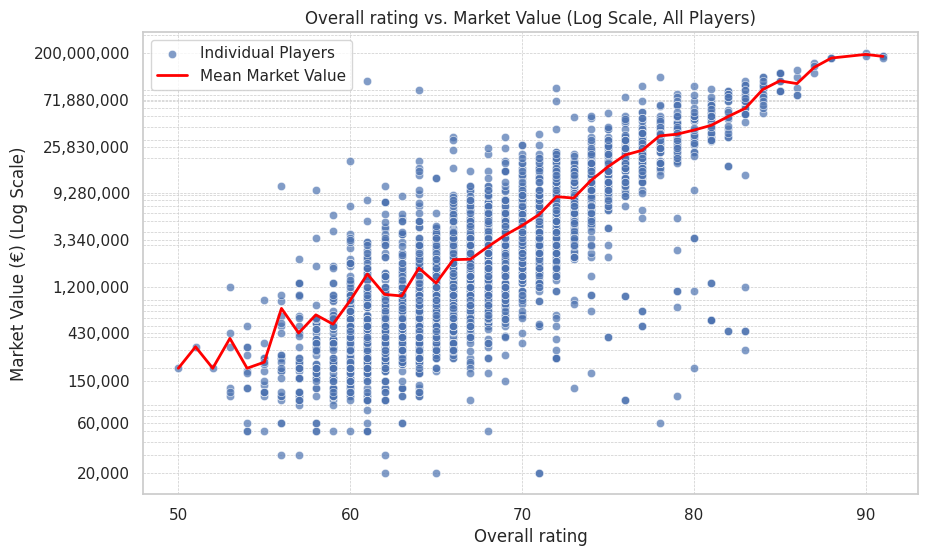

In [4]:
# 2️⃣ Scatter Plot: Best Overall vs. Market Value (All Players) with Logarithmic Scale
plt.figure(figsize=(10, 6))

# Compute mean market value per Best Overall
mean_market_value_by_overall = df.groupby("Overall rating")["MarketValue"].mean().reset_index()

# Scatter plot
sns.scatterplot(data=df, x="Overall rating", y="MarketValue", alpha=0.7, label="Individual Players")

# Line plot of mean market value per Best Overall
sns.lineplot(data=mean_market_value_by_overall, x="Overall rating", y="MarketValue", color='red', linewidth=2, label="Mean Market Value")

plt.yscale("log")  # Apply logarithmic scale
plt.yticks(log_ticks, [f"{int(tick):,}" for tick in log_ticks])  # Format y-axis ticks
plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Add dashed grid lines
plt.title("Overall rating vs. Market Value (Log Scale, All Players)")
plt.xlabel("Overall rating")
plt.ylabel("Market Value (€) (Log Scale)")
plt.legend()
scatterplot_path = os.path.join(plot_dir, f"rating_vs_market_value_vs_mean_FW_logarithmic.png")
plt.savefig(scatterplot_path, dpi=300)
plt.show()


In [10]:
features = [
    # Technical & playmaking
    "Vision",
    "Dribbling",
    "Progressive Passes",
    "Progressive Carries",
    "xAG: Exp. Assisted Goals",
    "xG: Expected Goals",
    "npxG: Non-Penalty xG",
    "Goals + Assists",
    "Assists",

    # Intelligence & anticipation
    "Reactions",
    "Growth",

    # Movement & endurance
    "Acceleration",
    "Sprint speed",
    "Agility",
    "Stamina",
    "Growth",
    # Physical ability
    "Balance",
    "Shot power",
    "Matches Played",
    # Ratings & projection
    "Overall rating",
    "Potential",
    "Value",
    "Wage"
]

for feature in features:
    plt.figure(figsize=(10, 6))

    # Scatter
    sns.scatterplot(data=df, x=feature, y="MarketValue", alpha=0.5)

    # LOWESS smoothing line
    sns.regplot(data=df, x=feature, y="MarketValue", scatter=False, lowess=True, color='red', line_kws={"lw": 2})

    plt.yscale("log")
    plt.title(f"{feature} vs. Market Value (Log Scale)")
    plt.xlabel(feature)
    plt.ylabel("Market Value (€)")
    plt.grid(True, linestyle="--", linewidth=0.5)
    scatterplot_path = os.path.join(plot_dir, f"{feature}_vs_market_value_lowess.png")
    plt.savefig(scatterplot_path, dpi=300)
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

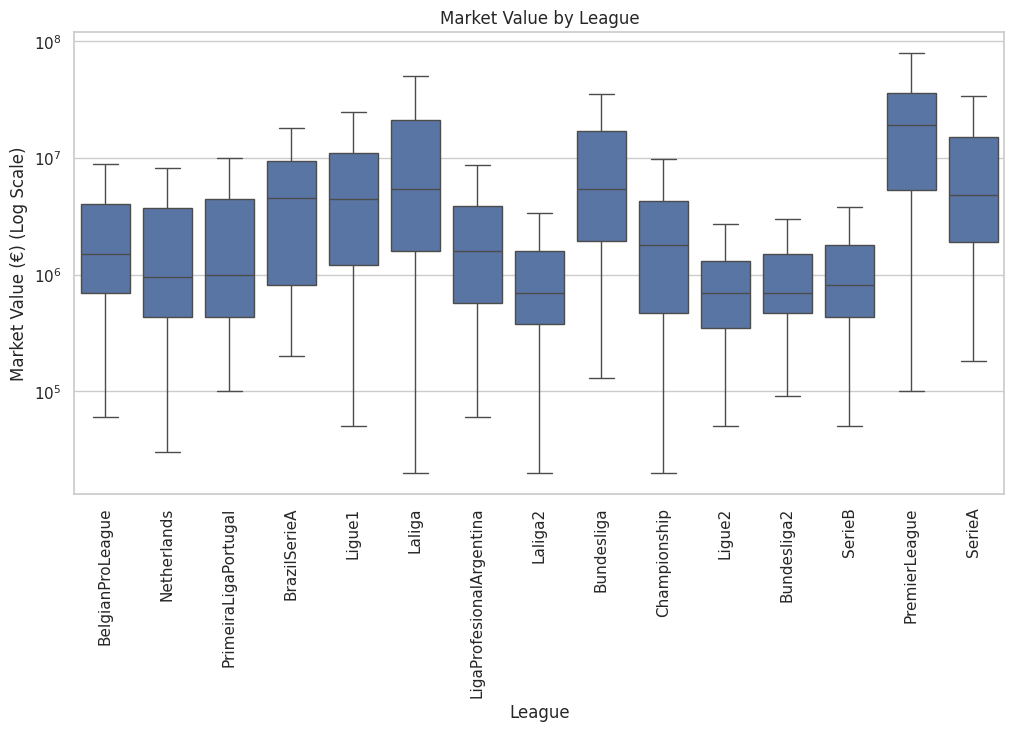

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Source_League", y="MarketValue", showfliers=False)
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Market Value by League")
plt.xlabel("League")
plt.ylabel("Market Value (€) (Log Scale)")
scatterplot_path = os.path.join(plot_dir, f"Leagues_vs_marketValue_boxplot.png")
plt.savefig(scatterplot_path, dpi=300)
plt.show()


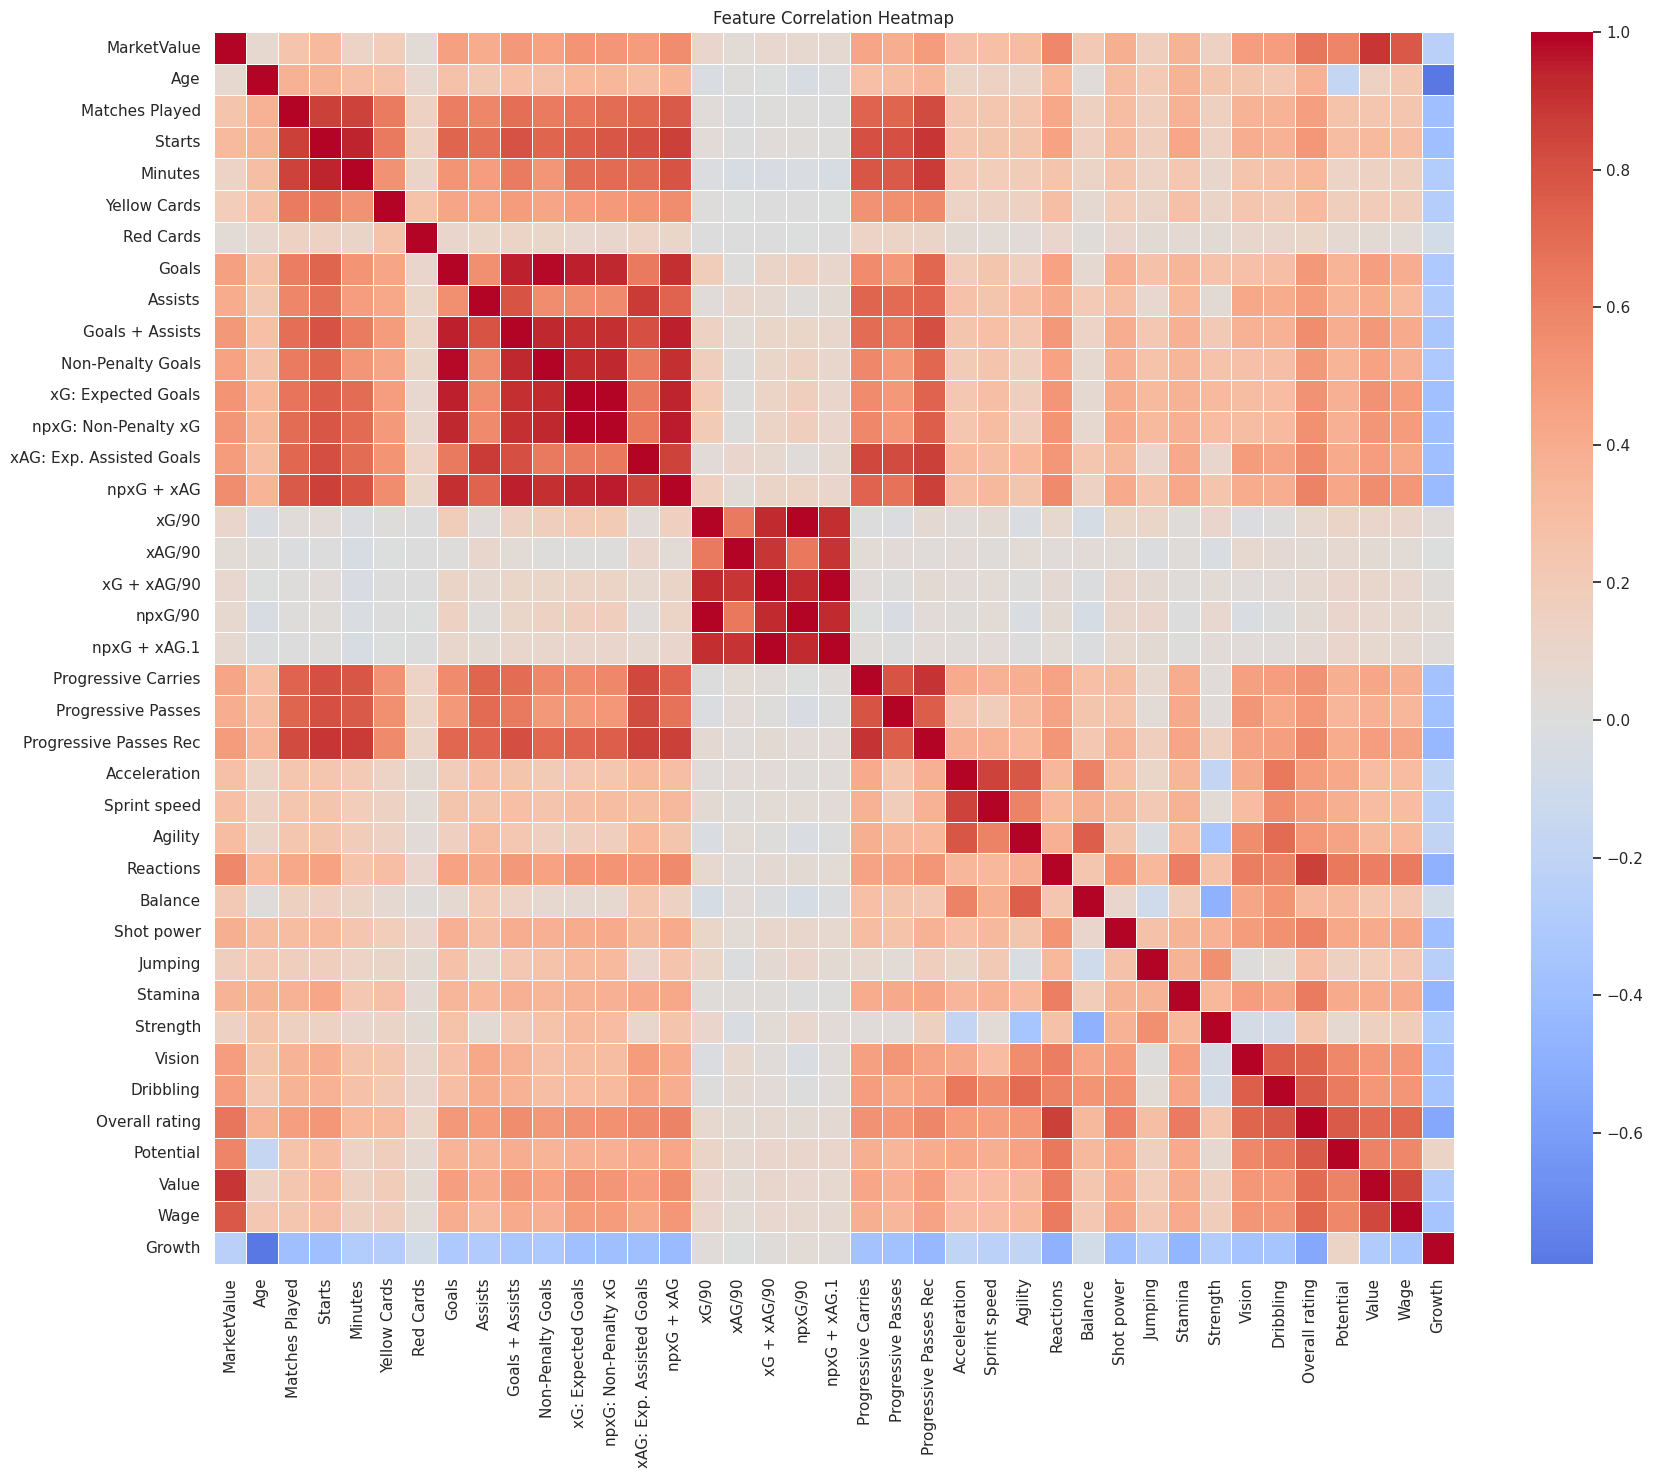

<ipython-input-8-f252a3303daf>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_value_corr.values, y=market_value_corr.index, palette="coolwarm_r")


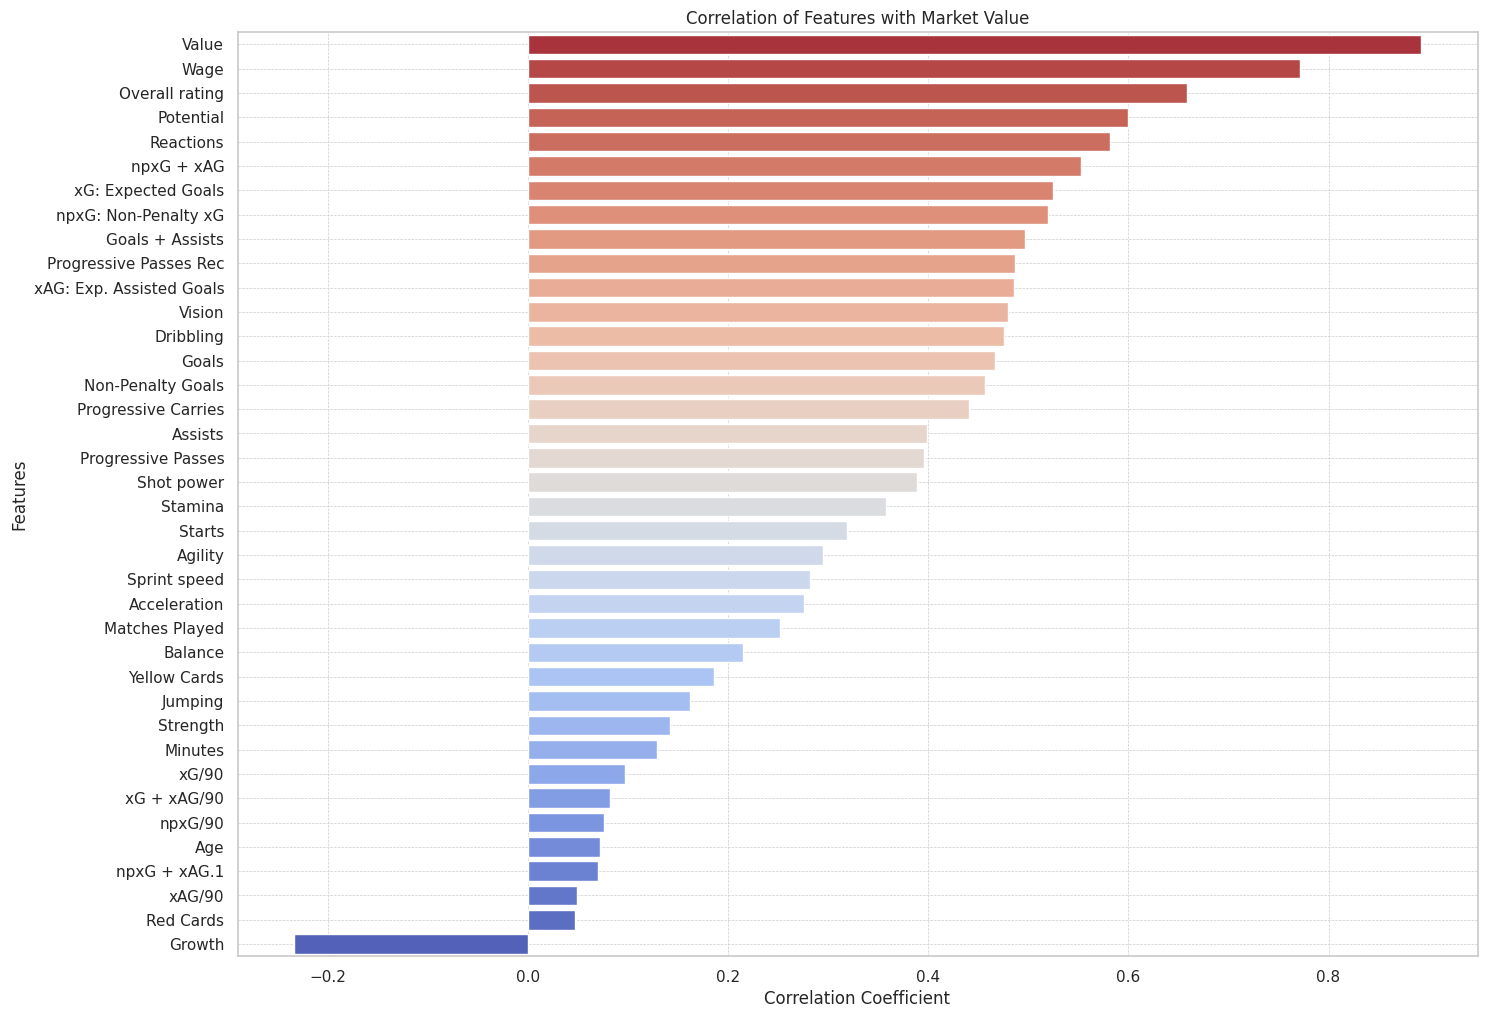

In [8]:
def plot_correlation_heatmap(df, exclude_features=[]):
    plt.figure(figsize=(20, 16))
    correlation_matrix = df[include_features].corr()
    sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", center=0, linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.savefig(os.path.join(plot_dir, "feature_correlation_heatmap.png"), dpi=300)
    plt.show()

    # Plot correlation between Market Value and all other features
    market_value_corr = df[include_features].corr()["MarketValue"].drop("MarketValue").sort_values(ascending=False)

    plt.figure(figsize=(16, 12))
    sns.barplot(x=market_value_corr.values, y=market_value_corr.index, palette="coolwarm_r")
    plt.xlabel("Correlation Coefficient")
    plt.ylabel("Features")
    plt.title("Correlation of Features with Market Value")
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.savefig(os.path.join(plot_dir, "market_value_feature_correlation.png"), dpi=300)
    plt.show()


# Example usage: plot heatmap excluding specific columns
include_features = [
    "MarketValue",

    # General info
    "Age", "Matches Played", "Starts", "Minutes",

    # Discipline
    "Yellow Cards", "Red Cards",

    # Offensive performance
    "Goals", "Assists", "Goals + Assists", "Non-Penalty Goals",
    "xG: Expected Goals", "npxG: Non-Penalty xG", "xAG: Exp. Assisted Goals", "npxG + xAG",
    "xG/90", "xAG/90", "xG + xAG/90", "npxG/90", "npxG + xAG.1",
    "Progressive Carries", "Progressive Passes", "Progressive Passes Rec",

    # Physical attributes
     "Acceleration", "Sprint speed", "Agility",
    "Reactions", "Balance", "Shot power", "Jumping", "Stamina", "Strength",

    # Technical
    "Vision", "Dribbling",

    # Defensive stats

    # Ratings
    "Overall rating", "Potential",

    # Financials
    "Value", "Wage",
    "Growth"

]


plot_correlation_heatmap(df, exclude_features=include_features)


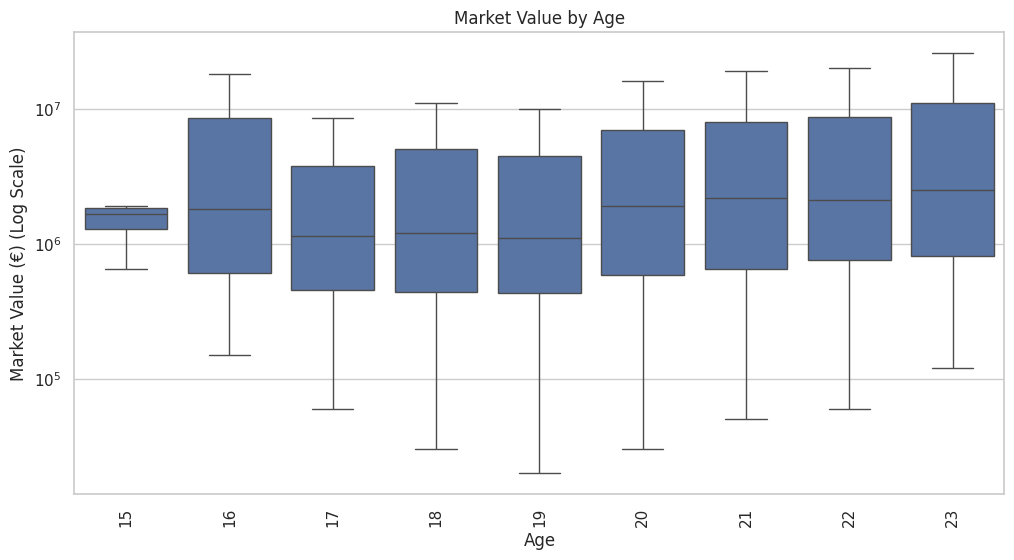

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Age", y="MarketValue", showfliers=False)
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Market Value by Age")
plt.xlabel("Age")
plt.ylabel("Market Value (€) (Log Scale)")
scatterplot_path = os.path.join(plot_dir, f"age_vs_marketValue_boxplot.png")
plt.savefig(scatterplot_path, dpi=300)
plt.show()
